In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bank_df = pd.read_csv('Bank_data_sep.csv')
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [6]:
bank_dtypes = dict(bank_df.dtypes)
cat_columns = [key for key,values in bank_dtypes.items() if values == 'object']
cat_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [8]:
cols = bank_df['job'].value_counts().keys()
cols

Index(['management', 'blue-collar', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'entrepreneur', 'unemployed', 'housemaid',
       'student', 'unknown'],
      dtype='object', name='job')

In [10]:
bank_jobs_count = bank_df['job'].unique()
count = []
for i in bank_jobs_count:
    con = bank_df['job'] == i
    count.append(len(bank_df[con]))
cols = ['Job','Number of Customers']
job_df = pd.DataFrame(zip(bank_jobs_count,count),
                     columns=cols)
job_df.to_csv('Bank_jobs_df.csv',index=False)
job_df

,Job,Number of Customers
0,unemployed,128
1,services,417
2,management,969
3,blue-collar,946
4,self-employed,183
5,technician,768
6,entrepreneur,168
7,admin.,478
8,student,84
9,housemaid,112


In [17]:
marital = bank_df['marital'].unique()
count=[]
for i in marital:
    con = bank_df['marital'] == i
    count.append(len(bank_df[con]))

cols = ['Marital Status','Number of Customers']
marital_df = pd.DataFrame(zip(marital,count), columns = cols)
marital_df.to_csv("Bank_marital_df.csv",index=False)
marital_df

,Marital Status,Number of Customers
0,married,2797
1,single,1196
2,divorced,528


***Create a data frame***
- There two methods
    1. We can iterate using for loop and find it by using the unique keys
    2. by using crosstab

**Method - 1**

In [27]:
bank_jobs_count = bank_df['job'].unique()
marital = bank_df['marital'].unique()
married_count=[]
single_count = []
divorced_count = []
for job in bank_jobs_count:
    con_job = bank_df['job'] == job
    con_married = bank_df['marital'] == 'married'
    con_single = bank_df['marital'] == 'single'
    con_divorced = bank_df['marital'] == 'divorced'
    con_job_married = con_job & con_married
    con_job_single = con_job & con_single
    con_job_divorced = con_job & con_divorced
    married_count.append(len(bank_df[con_job_married]))
    single_count.append(len(bank_df[con_job_single]))
    divorced_count.append(len(bank_df[con_job_divorced]))
cols = ['married', 'single', 'divorced']
bank_jobs_vs_marital_df = pd.DataFrame(list(zip(married_count, single_count, divorced_count)), columns=cols, index=bank_jobs_count)
bank_jobs_vs_marital_df

,married,single,divorced
unemployed,75,31,22
services,236,119,62
management,557,293,119
blue-collar,693,174,79
self-employed,127,41,15
technician,411,268,89
entrepreneur,132,20,16
admin.,266,143,69
student,10,74,0
housemaid,84,15,13


**Method - 2**

In [37]:
job_vs_marital = pd.crosstab(bank_df['job'],bank_df['marital'])
job_vs_marital

marital,divorced,married,single
job,,,
admin.,69,266,143
blue-collar,79,693,174
entrepreneur,16,132,20
housemaid,13,84,15
management,119,557,293
retired,43,176,11
self-employed,15,127,41
services,62,236,119
student,0,10,74


<Axes: xlabel='job'>

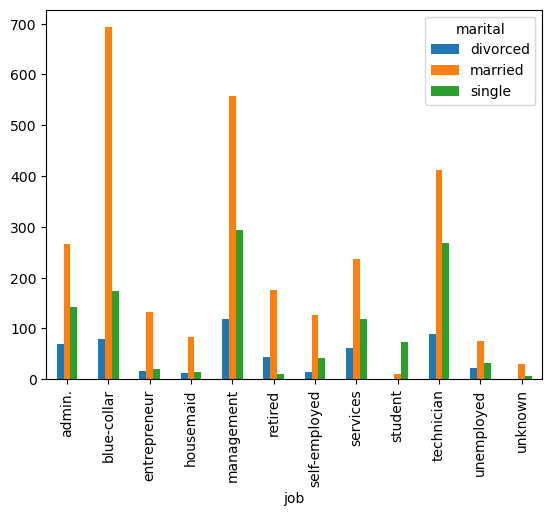

In [39]:
job_vs_marital.plot(kind = 'bar')

- the above code works the same way as the code using for loop but with this, we can be able to get multiple data to be there in the same data frame instead of using multiple condition statements
- see the bellow code for more understanding

In [32]:
idx_column = bank_df['job']
data_column = [bank_df['marital'],bank_df['loan']]
job_vs_marital_loan = pd.crosstab(idx_column, data_column)
job_vs_marital_loan

marital       divorced     married      single    
loan                no yes      no  yes     no yes
job                                               
admin.              55  14     212   54    120  23
blue-collar         67  12     581  112    142  32
entrepreneur        11   5     103   29     13   7
housemaid           13   0      72   12     14   1
management          94  25     486   71    269  24
retired             37   6     153   23      8   3
self-employed       13   2     105   22     35   6
services            55   7     185   51    103  16
student              0   0      10    0     73   1
technician          72  17     343   68    234  34
unemployed          20   2      65   10     30   1
unknown              1   0      29    1      7   0

- in the above code we can us multiple columns to check data with other columns and we can have multiple columns but it will not look great when we visualize it

<Axes: xlabel='job'>

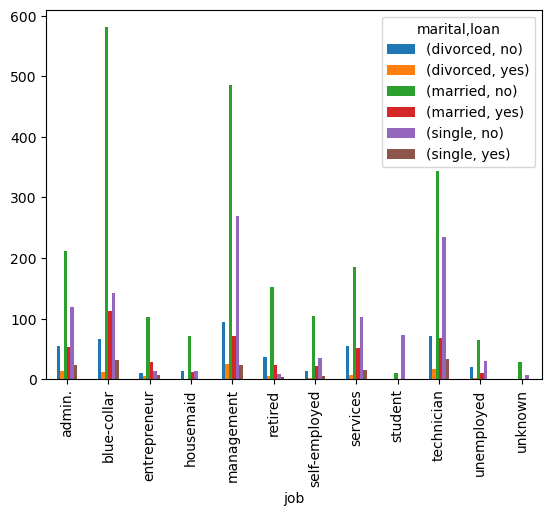

In [35]:
job_vs_marital_loan.plot(kind = 'bar')

- We can use the same for other columns as well and we can play around in the sand box

In [46]:
education = bank_df['education'].unique()
count=[]
for i in education:
    con = bank_df['education'] == i
    count.append(len(bank_df[con]))

cols = ['Education','Number of Customers']
education_df = pd.DataFrame(zip(education,count), columns = cols)
education_df.to_csv("education_df.csv",index=False)
education_df

,Education,Number of Customers
0,primary,678
1,secondary,2306
2,tertiary,1350
3,unknown,187


In [48]:
default = bank_df['default'].unique()
count=[]
for i in default:
    con = bank_df['default'] == i
    count.append(len(bank_df[con]))

cols = ['Default','Number of Customers']
default_df = pd.DataFrame(zip(default,count), columns = cols)
default_df.to_csv("default_df.csv",index=False)
default_df

,Default,Number of Customers
0,no,4445
1,yes,76


In [50]:
housing = bank_df['housing'].unique()
count=[]
for i in housing:
    con = bank_df['housing'] == i
    count.append(len(bank_df[con]))

cols = ['Housing','Number of Customers']
housing_df = pd.DataFrame(zip(housing,count), columns = cols)
housing_df.to_csv("housing_df.csv",index=False)
housing_df

,Housing,Number of Customers
0,no,1962
1,yes,2559


In [52]:
loan = bank_df['loan'].value_counts()

keys = loan.keys()
values = loan.values
   

cols = ['Loan','Number of Customers']
loan_df = pd.DataFrame(zip(keys,values), columns = cols)
loan_df.to_csv("loan_df.csv",index=False)
loan_df

,Loan,Number of Customers
0,no,3830
1,yes,691


In [54]:
contact = bank_df['contact'].value_counts()

keys = contact.keys()
values = contact.values
   

cols = ['Contact','Number of Customers']
contact_df = pd.DataFrame(zip(keys,values), columns = cols)
contact_df.to_csv("contact_df.csv",index=False)
contact_df

,Contact,Number of Customers
0,cellular,2896
1,unknown,1324
2,telephone,301


In [56]:
month = bank_df['month'].value_counts()

keys = month.keys()
values = month.values
   

cols = ['Month','Number of Customers']
month_df = pd.DataFrame(zip(keys,values), columns = cols)
month_df.to_csv("month_df.csv",index=False)
month_df

,Month,Number of Customers
0,may,1398
1,jul,706
2,aug,633
3,jun,531
4,nov,389
5,apr,293
6,feb,222
7,jan,148
8,oct,80
9,sep,52


In [62]:
poutcome = bank_df['poutcome'].value_counts()
cols = ['Poutcome','Number of Customers']
poutcome_df = pd .DataFrame(zip(keys,values),columns = cols)
poutcome_df.to_csv("poutcome_df.csv")
poutcome_df

,Poutcome,Number of Customers
0,unknown,3705
1,failure,490
2,other,197
3,success,129


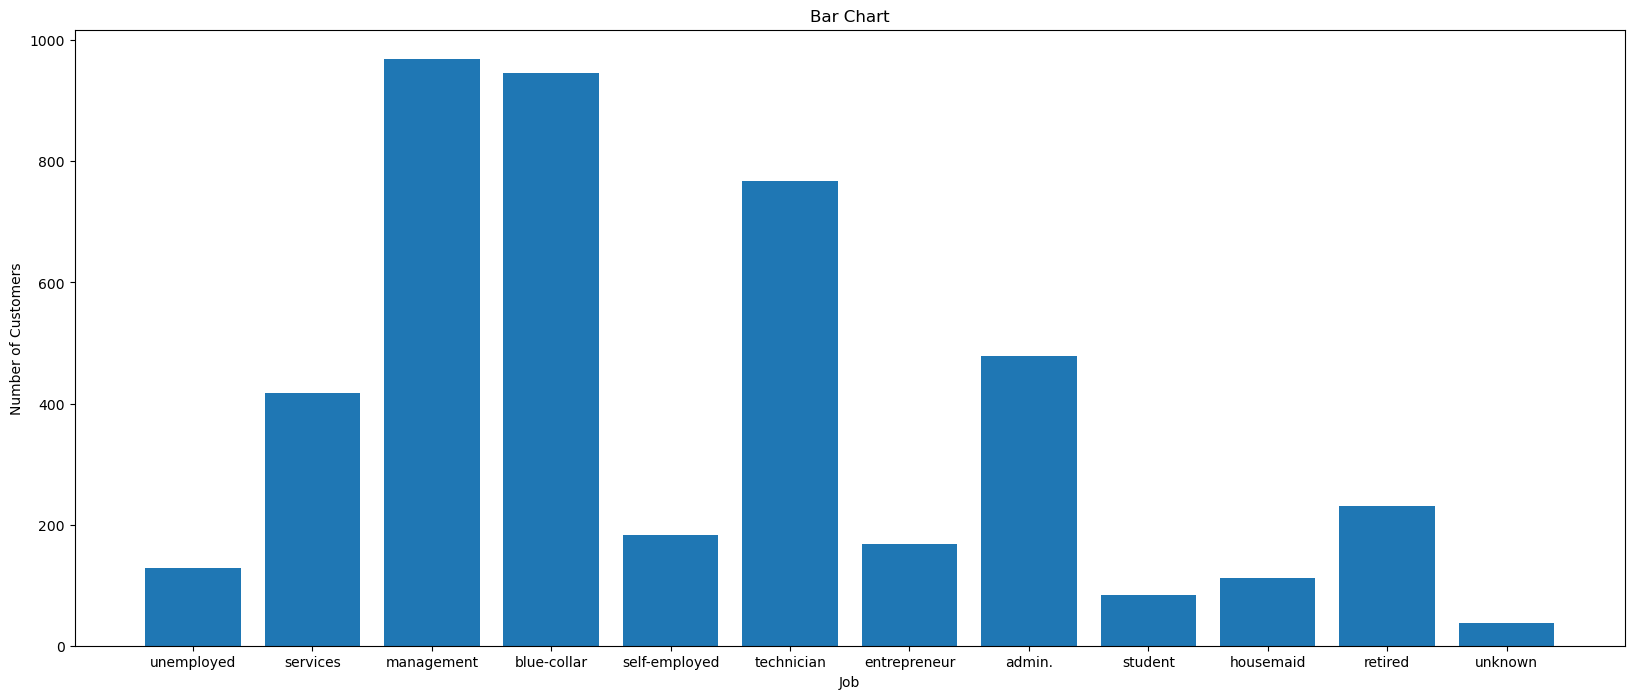

In [64]:
plt.figure(figsize = (20,8))
plt.bar('Job','Number of Customers',
       data = job_df)
plt.title("Bar Chart")
plt.xlabel("Job")
plt.ylabel('Number of Customers')
plt.savefig("job_bar_chart.jpg")
plt.show()

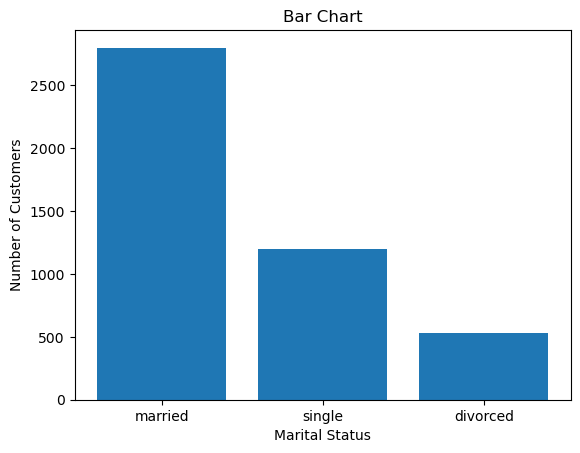

In [68]:
plt.bar('Marital Status','Number of Customers',
       data = marital_df)
plt.title("Bar Chart")
plt.xlabel("Marital Status")
plt.ylabel('Number of Customers')
plt.savefig("marital_bar_chart.jpg")
plt.show()

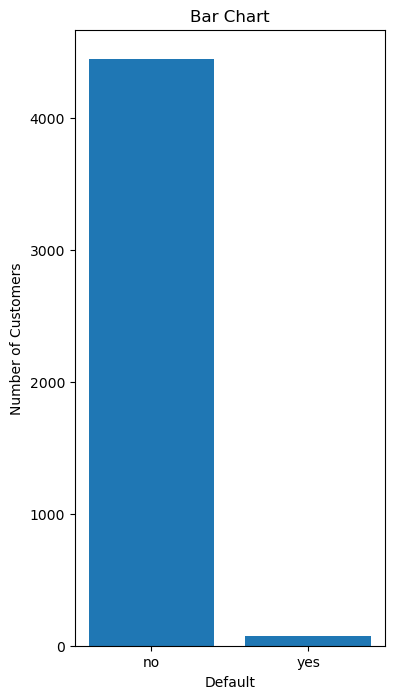

In [70]:
plt.figure(figsize = (4,8))
plt.bar('Default',
       'Number of Customers',
       data = default_df)
plt.title("Bar Chart")
plt.xlabel("Default")
plt.ylabel('Number of Customers')
plt.savefig("default_bar_chart.jpg")
plt.show()

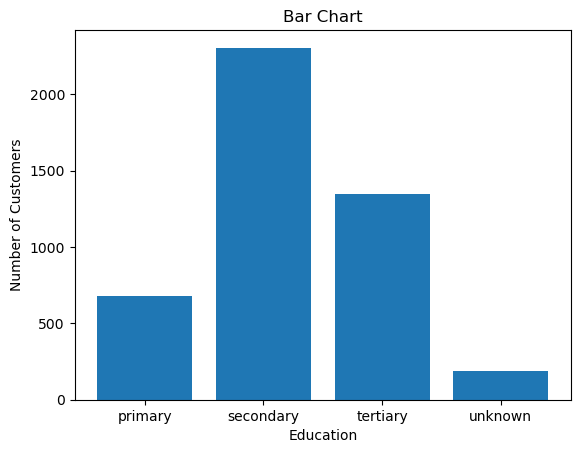

In [72]:
plt.bar('Education','Number of Customers',
       data = education_df)
plt.title("Bar Chart")
plt.xlabel("Education")
plt.ylabel('Number of Customers')
plt.savefig("education_bar_chart.jpg")
plt.show()

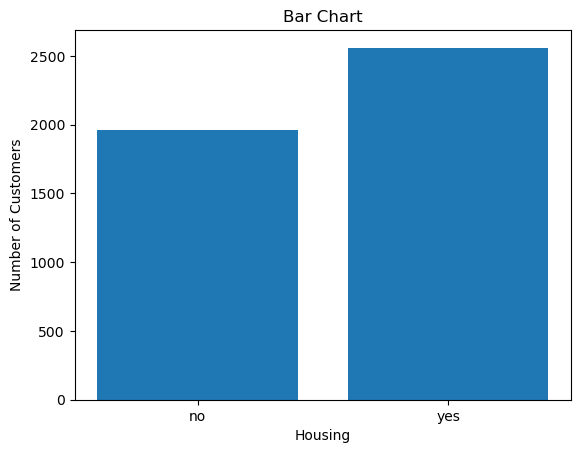

In [74]:
plt.bar('Housing','Number of Customers',
       data = housing_df)
plt.title("Bar Chart")
plt.xlabel("Housing")
plt.ylabel('Number of Customers')
plt.savefig("jhousing_bar_chart.jpg")
plt.show()

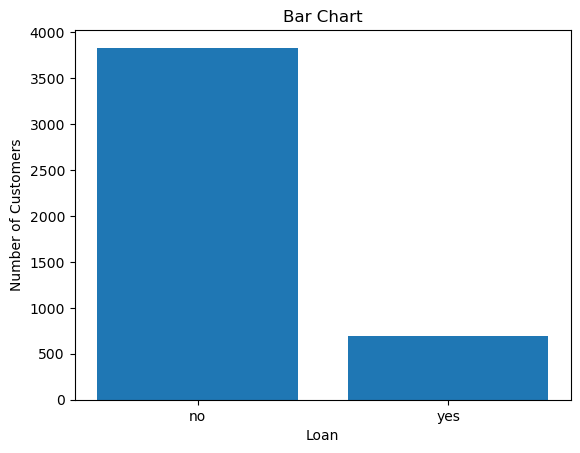

In [77]:
plt.bar('Loan','Number of Customers',
       data = loan_df)
plt.title("Bar Chart")
plt.xlabel("Loan")
plt.ylabel('Number of Customers')
plt.savefig("loan_bar_chart.jpg")
plt.show()

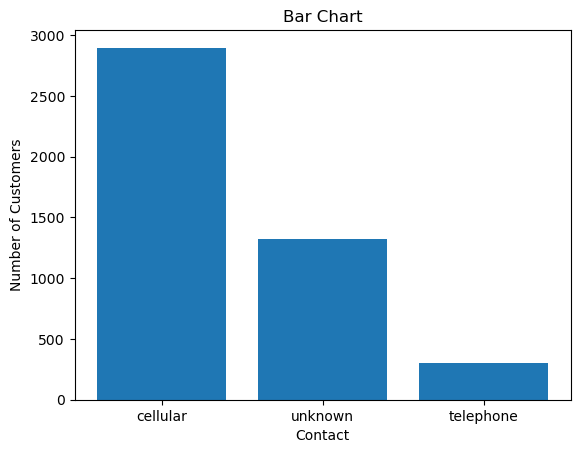

In [79]:
plt.bar('Contact','Number of Customers',
       data = contact_df)
plt.title("Bar Chart")
plt.xlabel("Contact")
plt.ylabel('Number of Customers')
plt.savefig("contact_bar_chart.jpg")
plt.show()

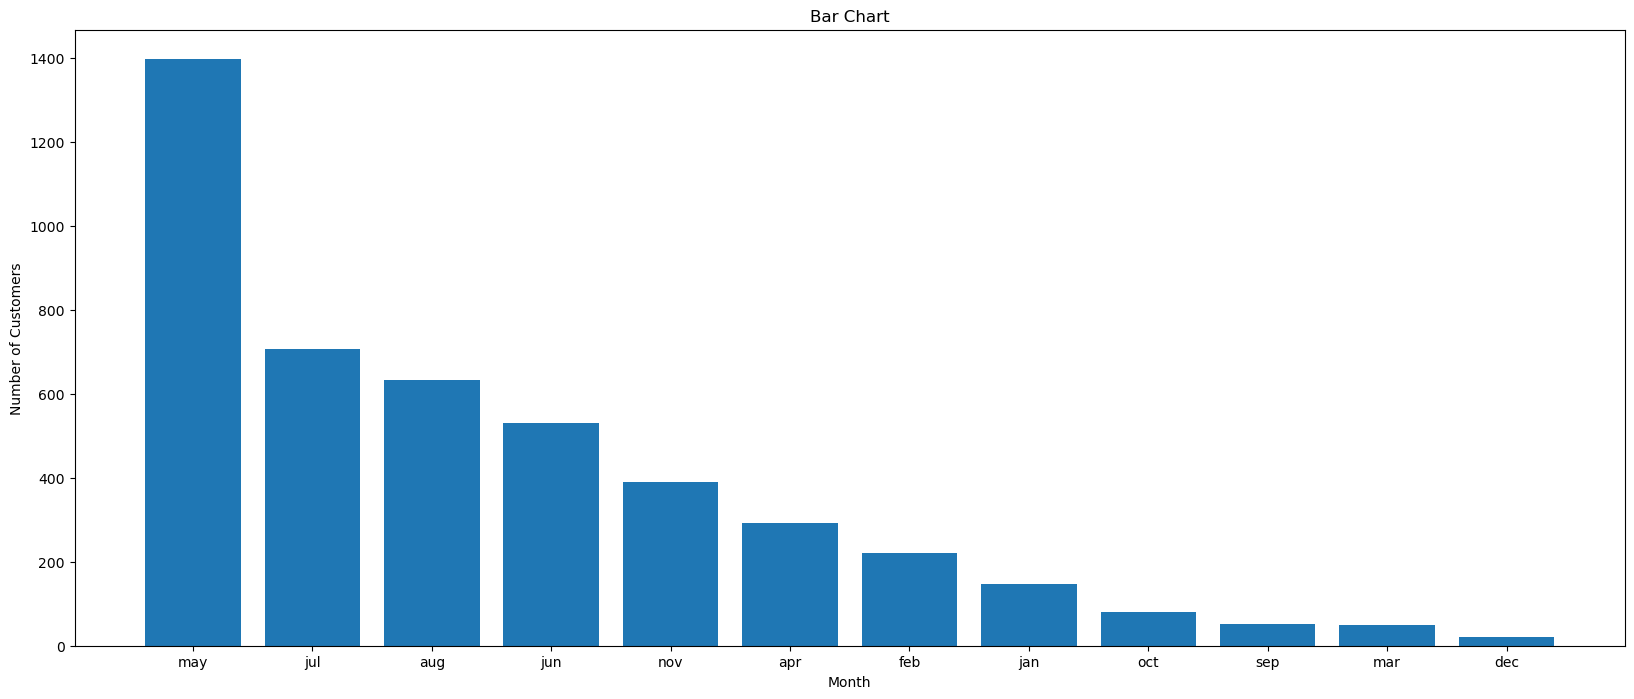

In [81]:
plt.figure(figsize = (20,8))
plt.bar('Month','Number of Customers',
       data = month_df)
plt.title("Bar Chart")
plt.xlabel("Month")
plt.ylabel('Number of Customers')
plt.savefig("month_bar_chart.jpg")
plt.show()

In [85]:
import os
files = os.listdir(os.getcwd())
result = [i for i in files if i.startswith('Bank_') ]
result

['Bank_data_sep.csv',
 'Bank_EDA_mohith.ipynb',
 'Bank_jobs_df.csv',
 'Bank_marital_df.csv']

In [99]:
try:
    root_directory = os.getcwd()
    new_folder = 'Value_Counts_df'
    new_dir_bar = os.path.join(root_directory,new_folder)
    os.makedirs(new_dir)

except Exception as e:
    print(e)

[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\mohit\\Git_clones_DS_class\\Bank_EDA_Data\\Bank Data EDA\\Value_Counts_df'


In [105]:
try:
    root_directory = os.getcwd()
    new_folder1 = 'Graphs_matplotlib_bank_df'
    new_dir1 = os.path.join(root_directory,new_folder1)
    os.makedirs(new_dir1)

except Exception as e:
    print(e)

In [91]:
root_directory = os.getcwd()
new_folder_bar = 'graphs'
new_dir_bar = os.path.join(root_directory, new_folder_bar)
if not os.path.exists(new_dir_bar):
 os.makedirs(new_dir_bar)
 print(f"Directory '{new_dir_bar}' created successfully.")
else:
 print(f"Directory '{new_dir_bar}' already exists.")

Directory 'C:\Users\mohit\Git_clones_DS_class\Bank_EDA_Data\Bank Data EDA\graphs' created successfully.


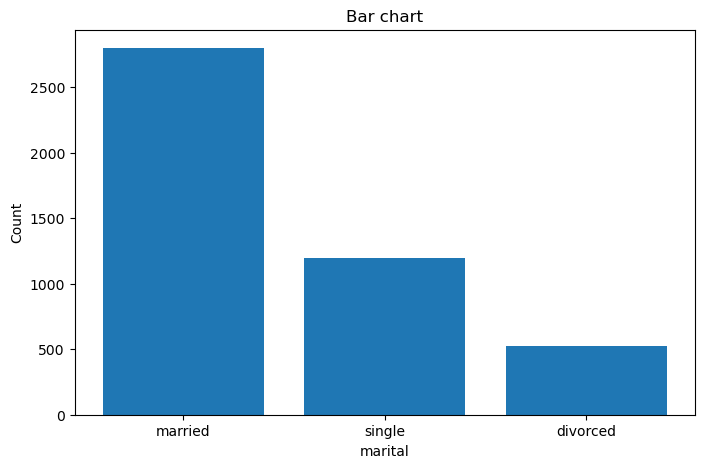

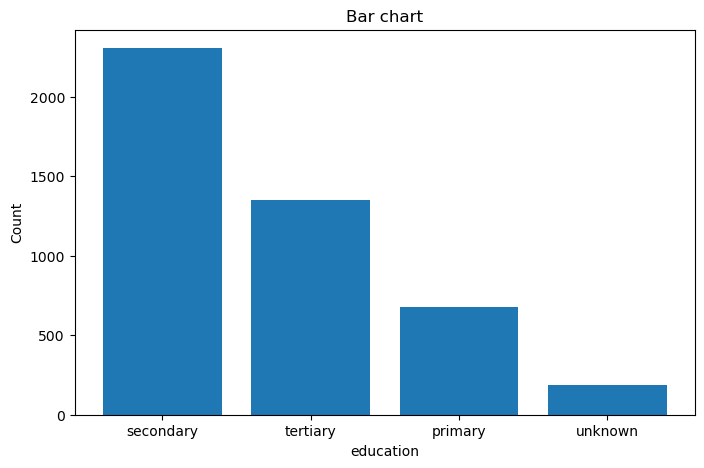

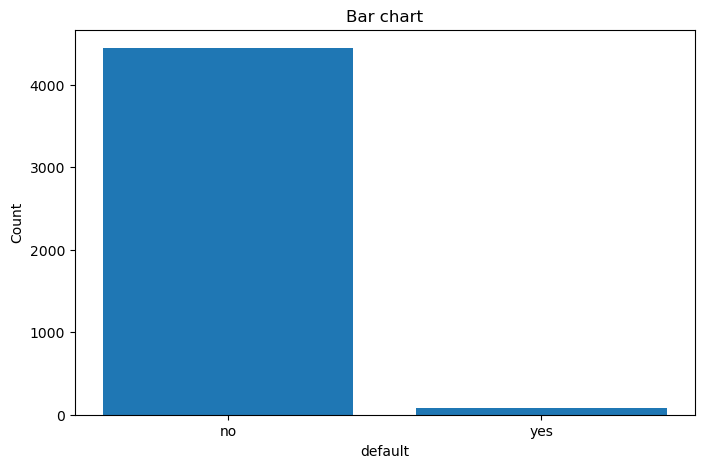

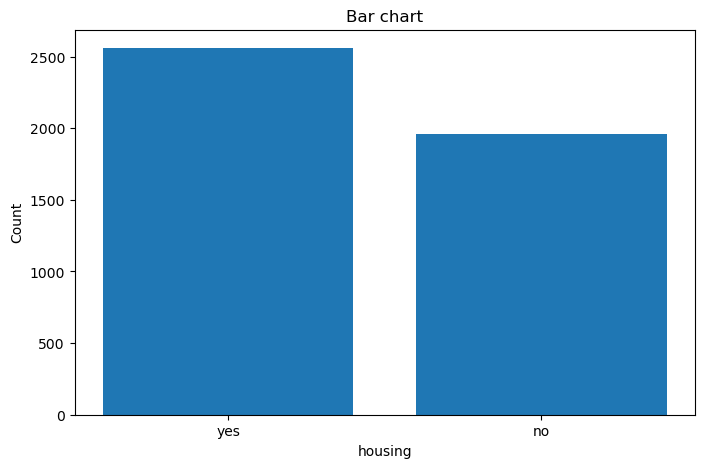

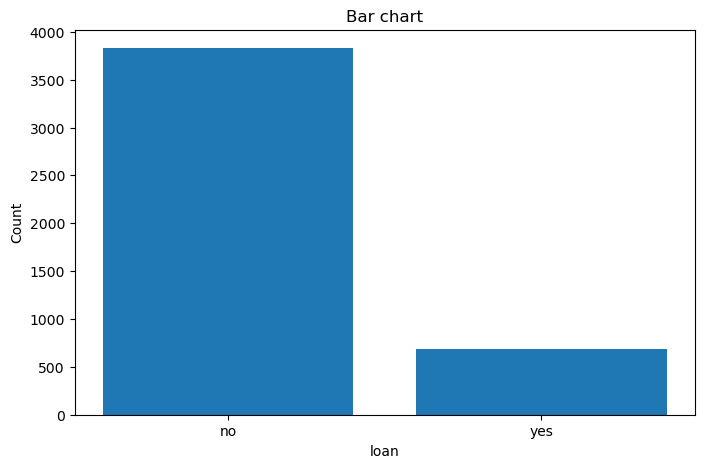

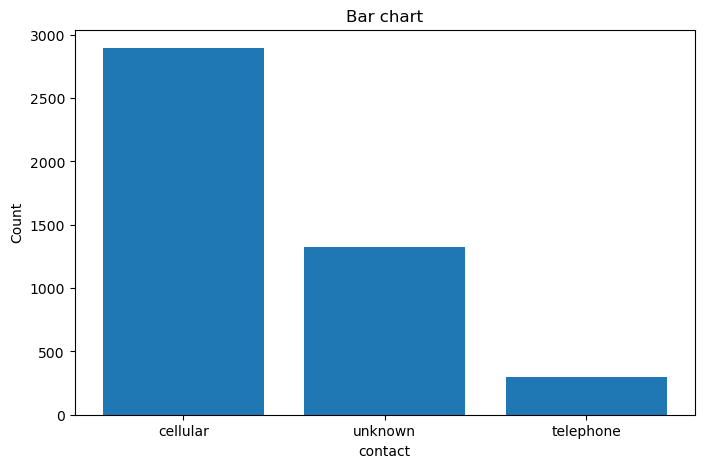

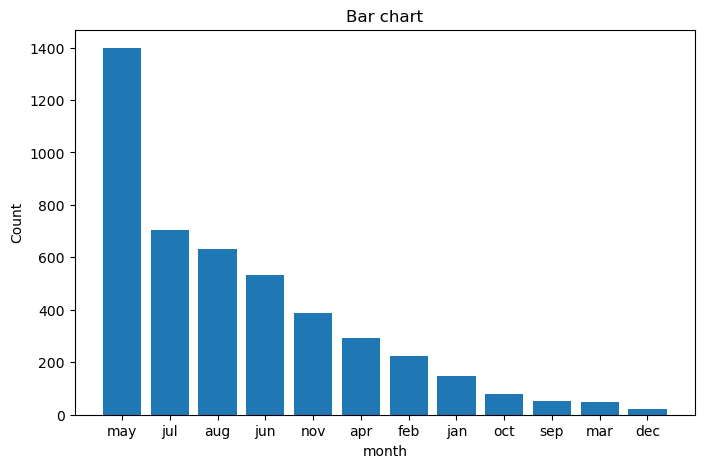

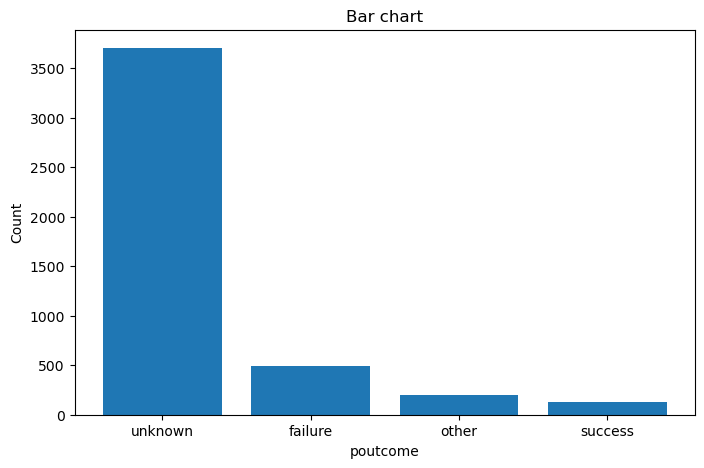

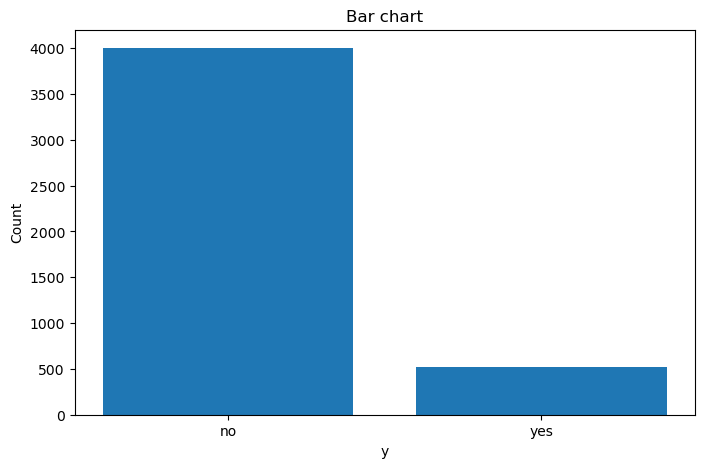

In [113]:
for i in cat_columns[1:]:
    plt.figure(figsize=(8, 5))
    value_counts = bank_df[i].value_counts()
    categories = value_counts.index
    counts = value_counts.values
    plt.bar(categories, counts)
    plt.title('Bar chart')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.savefig(f'{new_dir}/{i}_matplotlib.jpg')
    plt.show()

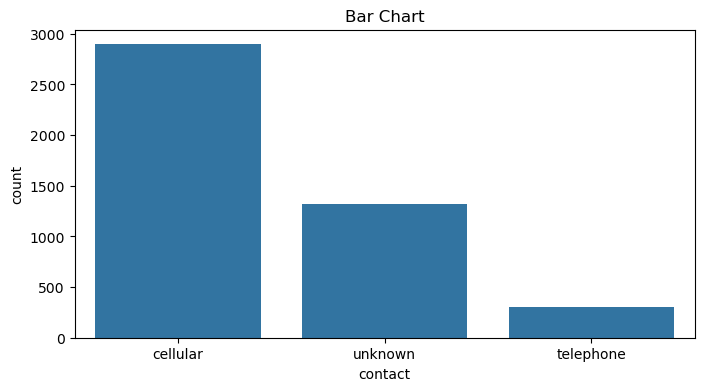

In [115]:
plt.figure(figsize = (8,4))
order_contact= ['cellular','unknown','telephone'] 
sns.countplot(data = bank_df,
             x = 'contact',
             order = order_contact )
plt.title("Bar Chart")
plt.savefig("Contact_bar_chart_using_seaborn.jpg")
plt.show()

In [117]:
try:
    root_directory = os.getcwd()
    new_folder2 = 'Graphs_Seaborn_bank_df'
    new_dir2 = os.path.join(root_directory,new_folder2)
    os.makedirs(new_dir2)

except Exception as e:
    print(e)

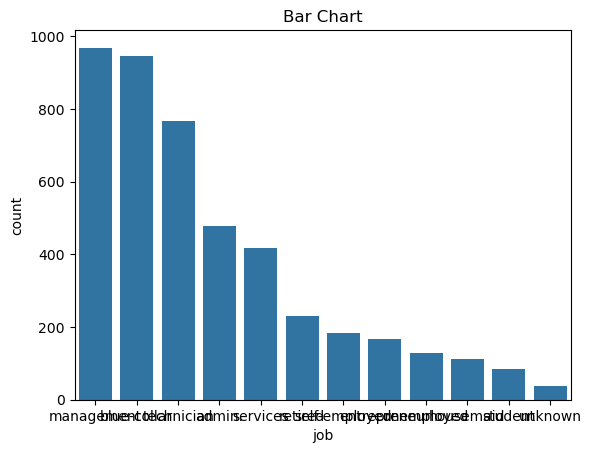

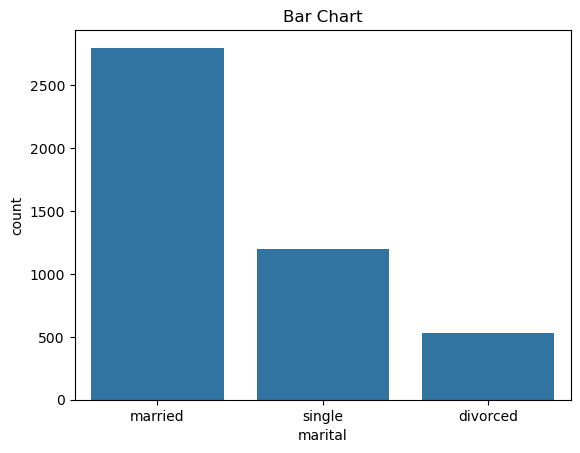

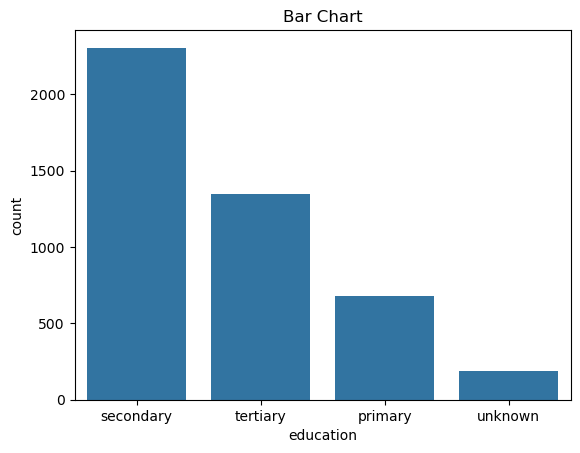

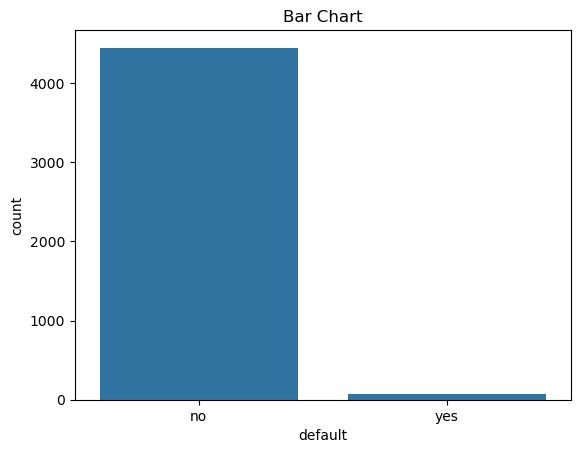

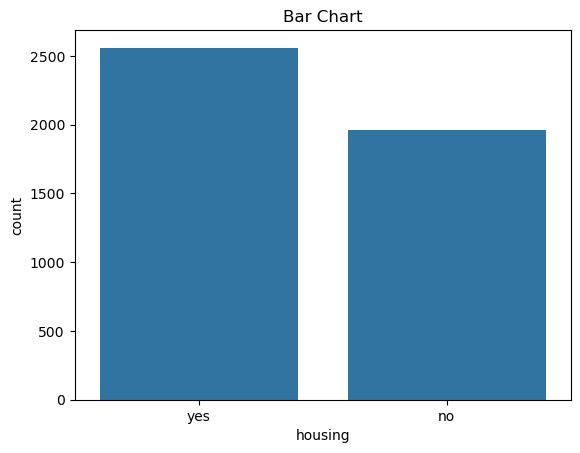

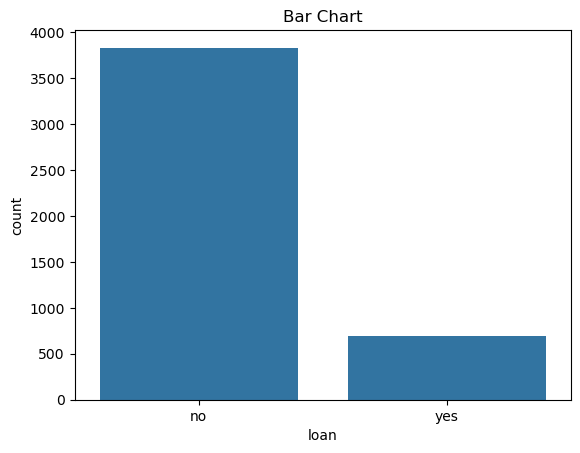

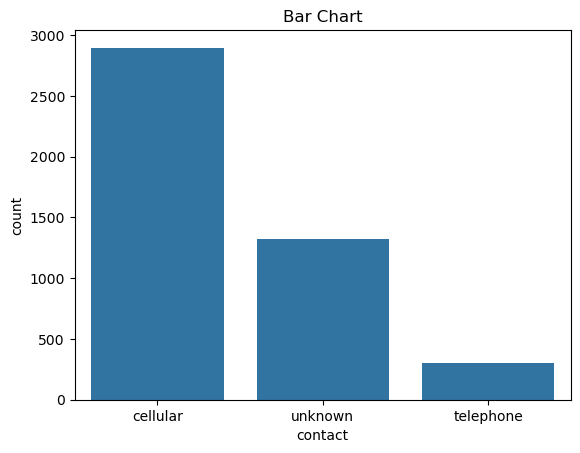

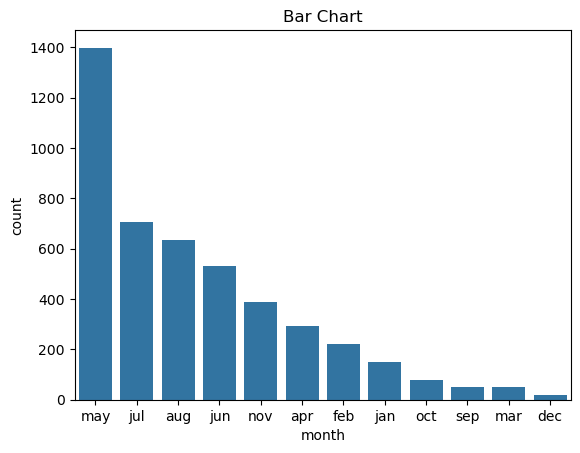

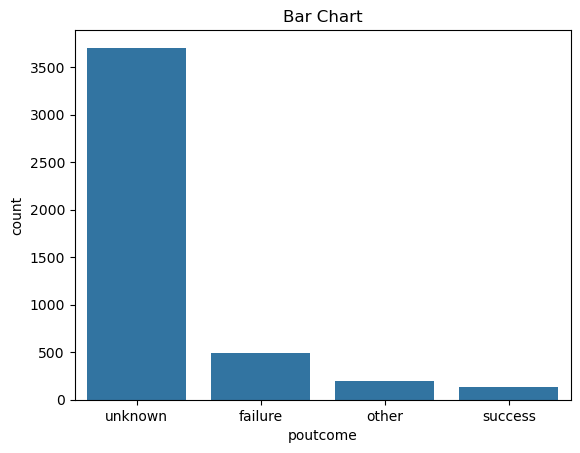

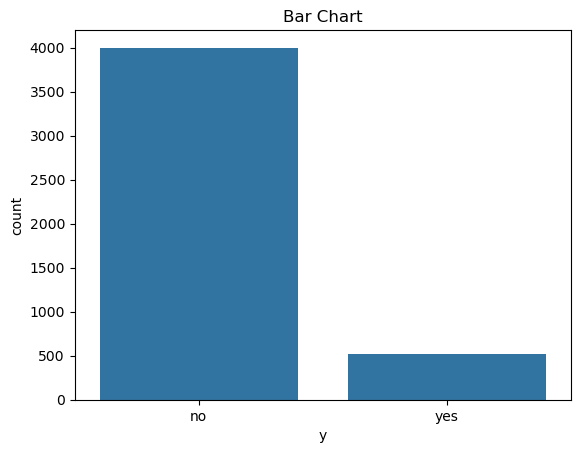

In [119]:
for i in cat_columns:
    
    order1 = bank_df[i].value_counts().keys()
    sns.countplot(data = bank_df,
                 x = i,
                 order = order1)
    plt.title("Bar Chart")
    plt.savefig(f"{new_dir2}\\{i}_seaborn.jpg")
    plt.show()

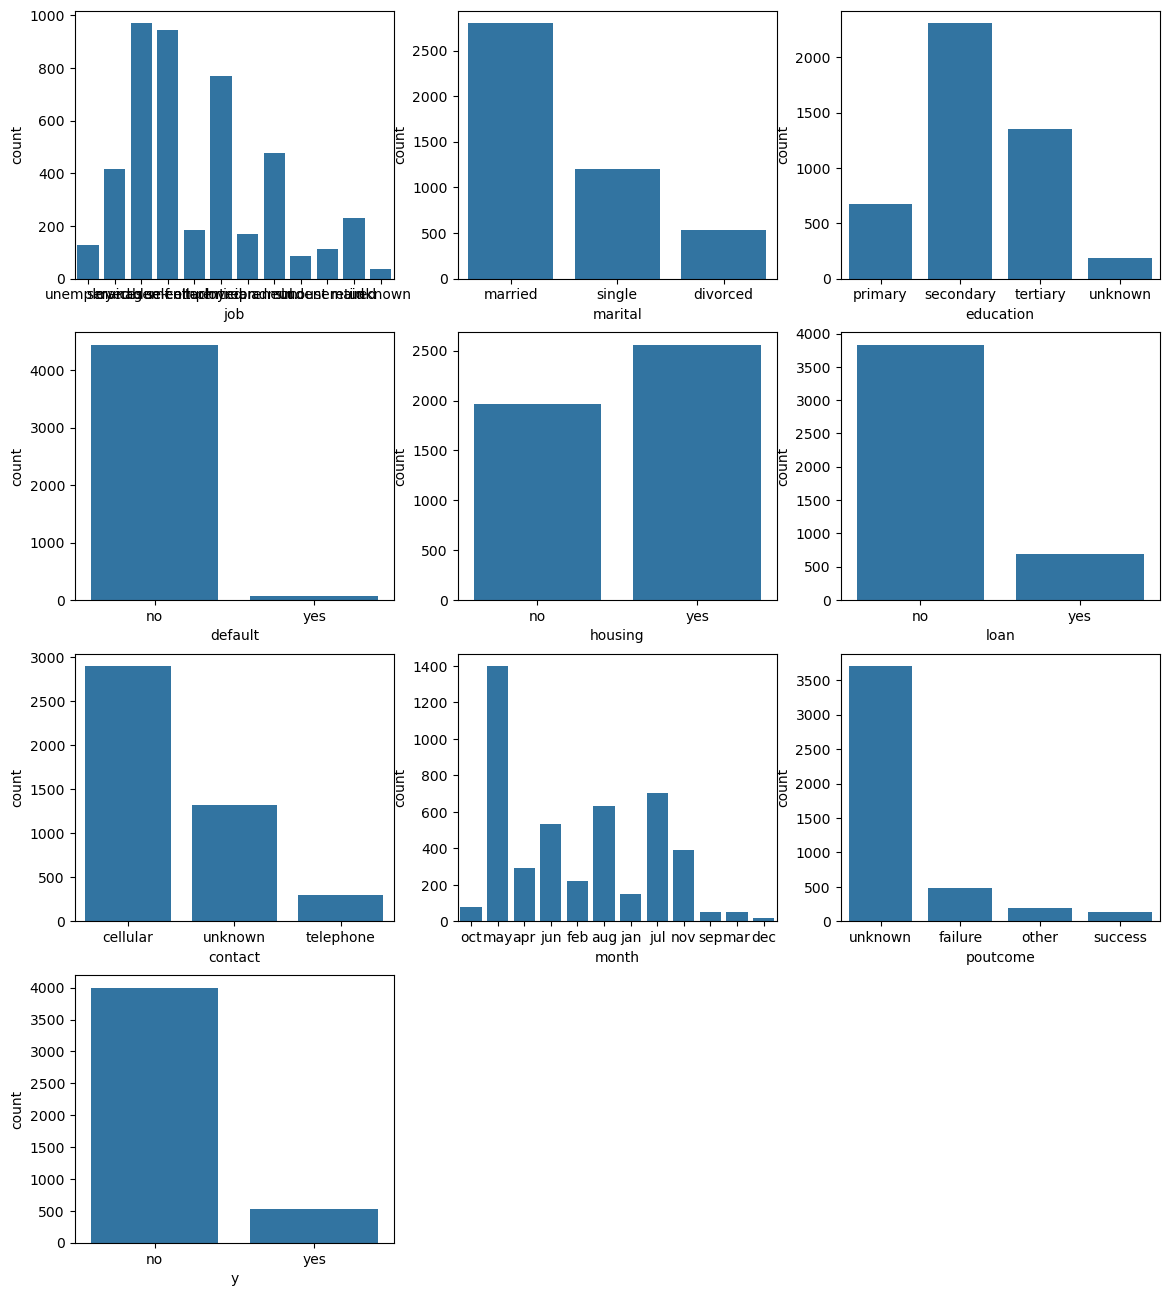

In [121]:
cols = cat_columns
plt.figure(figsize= (14,16))

for i in range(len(cols)):
    plt.subplot(4,3,i+1)
   
    sns.countplot(x = cols[i], data = bank_df)

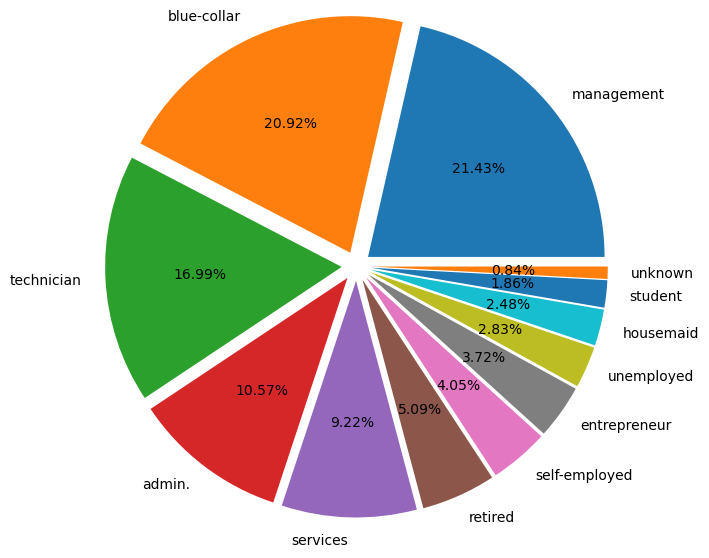

In [123]:
cds = bank_df['job'].value_counts()
keys = cds.keys()
values = cds.values
plt.pie(x = values,
        explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
        labels = keys,
        autopct = "%0.2f%%",
        radius = 1.6,
        startangle = 0)
plt.show()

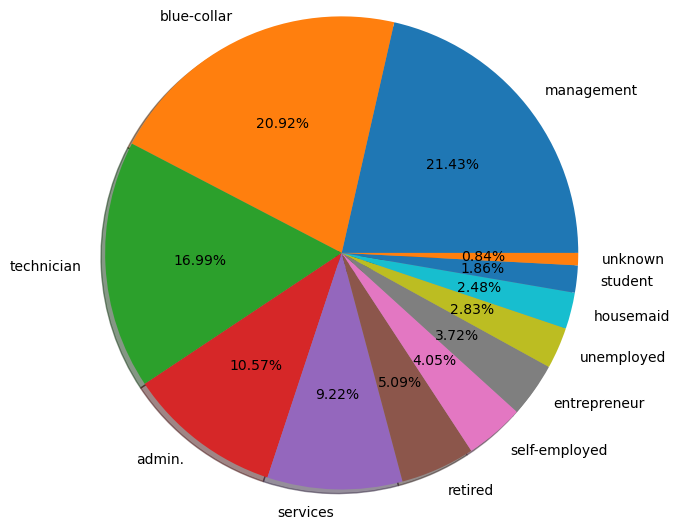

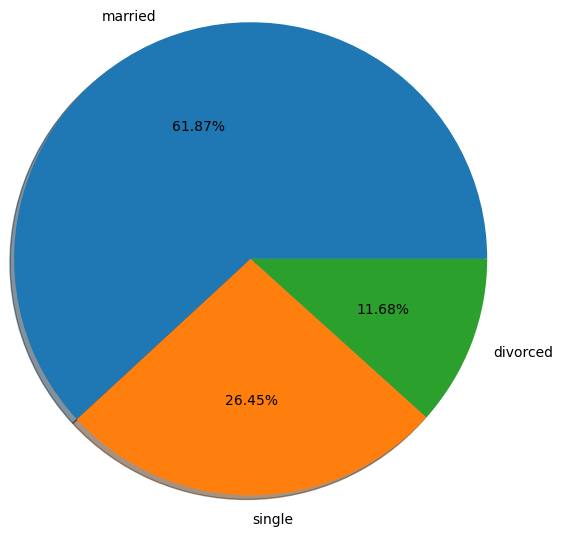

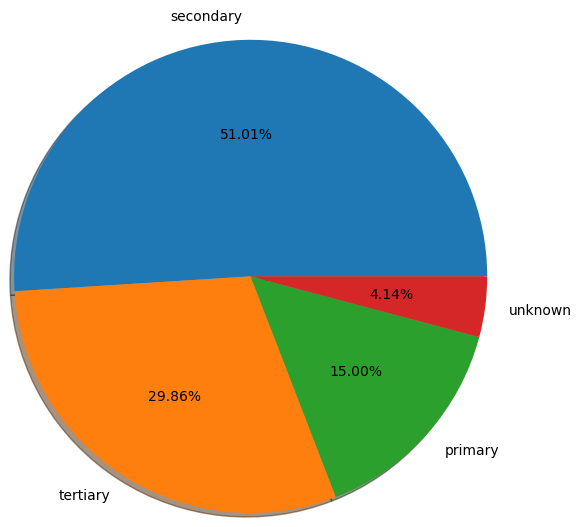

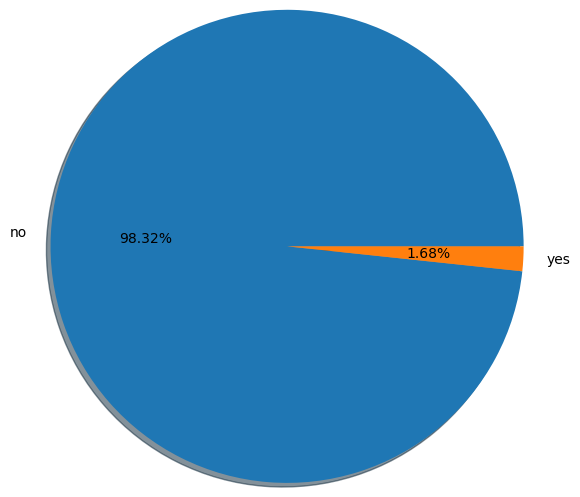

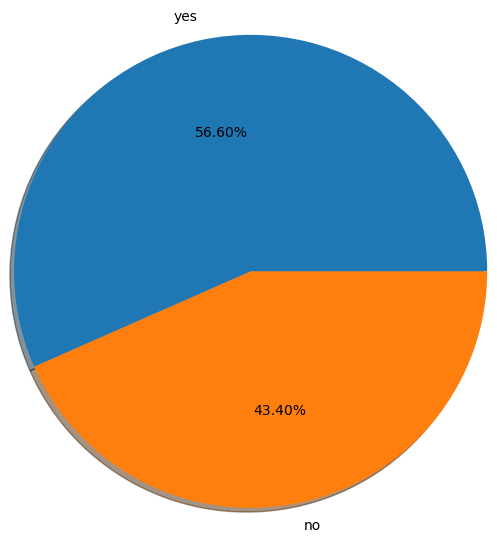

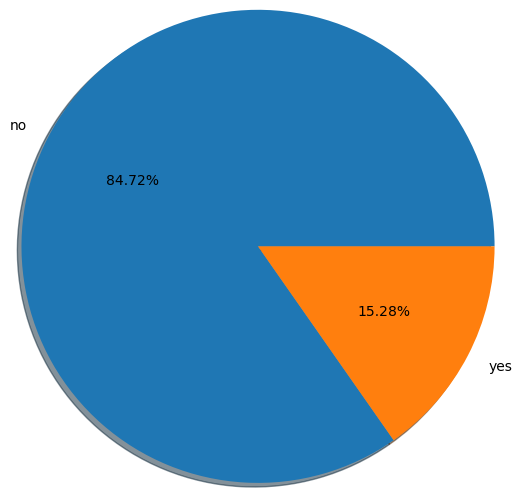

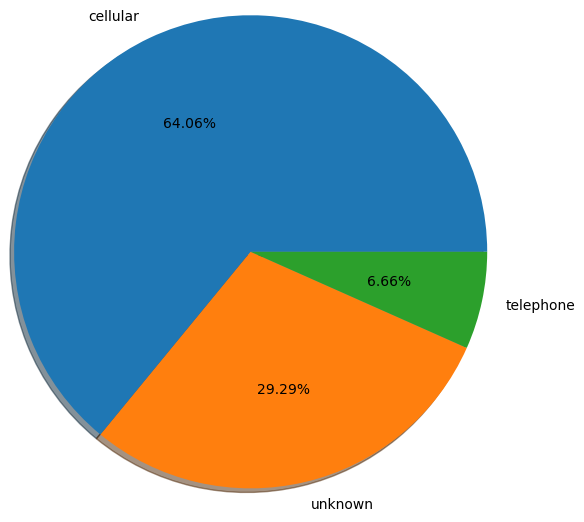

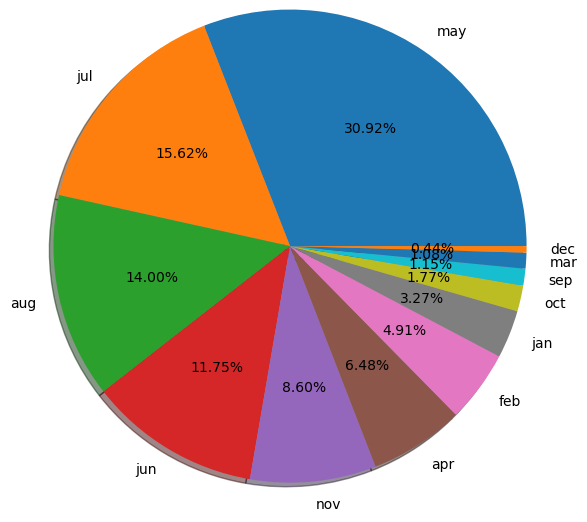

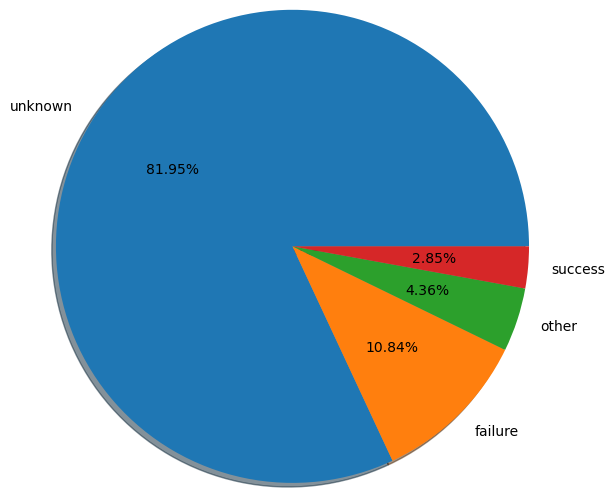

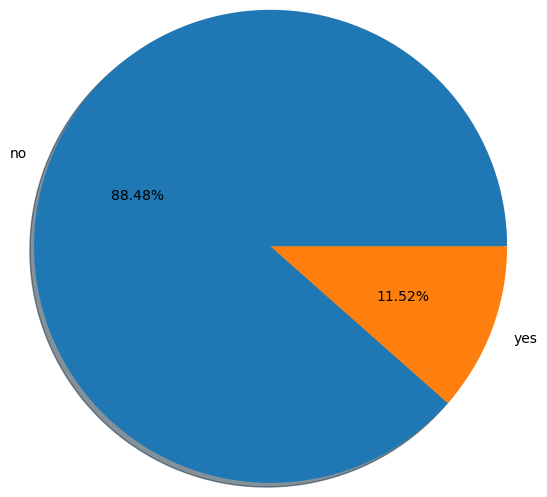

In [125]:
for i in cat_columns:
    cds = bank_df[i].value_counts()
    
    keys = cds.keys()
    
    values = cds.values
    
    plt.pie(x = values,
            #explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
            labels = keys,
            autopct = "%0.2f%%",
            shadow = True,
            radius = 1.6,
            startangle = 0)
    plt.show()

**Bank_Dataset_Numerical Column Analysis**

In [130]:
cat_column = bank_df.select_dtypes(include='object').columns
num_column = bank_df.select_dtypes(exclude='object').columns
num_column

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [134]:
for i in num_column:
    count_wage = len(bank_df[i])
    min_wage = min(bank_df[i])
    max_wage = max(bank_df[i])
    mean_wage = round(bank_df[i].mean(),2)
    median_wage = round(bank_df[i].median(),2)
    std_wage = round(bank_df[i].std(),2)
    wage_25p = round(np.percentile(bank_df[i],25),2)
    wage_50p = round(np.percentile(bank_df[i],50),2)
    wage_75p = round(np.percentile(bank_df[i],75),2)
    print(count_wage,min_wage,max_wage,mean_wage,median_wage,std_wage,wage_25p,wage_50p,wage_75p)

4521 19 87 41.17 39.0 10.58 33.0 39.0 49.0
4521 -3313 71188 1422.66 444.0 3009.64 69.0 444.0 1480.0
4521 1 31 15.92 16.0 8.25 9.0 16.0 21.0
4521 4 3025 263.96 185.0 259.86 104.0 185.0 329.0
4521 1 50 2.79 2.0 3.11 1.0 2.0 3.0
4521 -1 871 39.77 -1.0 100.12 -1.0 -1.0 -1.0
4521 0 25 0.54 0.0 1.69 0.0 0.0 0.0


In [136]:
df1 = pd.DataFrame()
for i in num_column:
    Count = len(bank_df[i])
    Min = min(bank_df[i])
    Max = max(bank_df[i])
    Mean = round(bank_df[i].mean(),2)
    Median = round(bank_df[i].median(),2)
    Std = round(bank_df[i].std(),2)
    p_25 = round(np.percentile(bank_df[i],25),2)
    p_50 = round(np.percentile(bank_df[i],50),2)
    p_75 = round(np.percentile(bank_df[i],75),2)
   
    data = [Count,Min,Max,Mean,Median,Std,p_25,p_50,p_75]
    index = ['Count','min','max','mean','median','std','25p','50p','75p']
    cols = [i]

    df2 = pd.DataFrame(data,index = index,columns = cols)
    df1 = pd.concat([df1,df2],axis=1)

df1
   

,age,balance,day,duration,campaign,pdays,previous
Count,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00
min,19.00,-3313.00,1.00,4.00,1.00,-1.00,0.00
max,87.00,71188.00,31.00,3025.00,50.00,871.00,25.00
mean,41.17,1422.66,15.92,263.96,2.79,39.77,0.54
median,39.00,444.00,16.00,185.00,2.00,-1.00,0.00
std,10.58,3009.64,8.25,259.86,3.11,100.12,1.69
25p,33.00,69.00,9.00,104.00,1.00,-1.00,0.00
50p,39.00,444.00,16.00,185.00,2.00,-1.00,0.00
75p,49.00,1480.00,21.00,329.00,3.00,-1.00,0.00


- To find the percentile we use the methods 
    1. We can use the above for loop
    2. Or we can use the describe function which make the life easier

In [138]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [141]:
# Case-1: 25p
duration_data = bank_df['duration']
p_25 = np.percentile(bank_df['duration'],25)
con = duration_data < p_25
print(len(bank_df[con]))
print(25*4521/100)

1114
1130.25


In [143]:
# Case-2: 50p
duration_data = bank_df['duration']
p_50 = np.percentile(bank_df['duration'],50)
con = duration_data < p_50
print(len(bank_df[con]))
print(50*4521/100)

2250
2260.5


In [145]:
# Case-3: 75p
duration_data = bank_df['duration']
p_75 = np.percentile(bank_df['duration'],75)
con = duration_data < p_75
print(len(bank_df[con]))
print(75*4521/100)

3387
3390.75


**Empirical Rule**

In [148]:
# case-1 : 68%
Mean = round(bank_df['duration'].mean(),2)
Std = round(bank_df['duration'].std(),2)
Ub = Mean + (1*Std)
Lb = Mean - (1*Std)
con1 = duration_data < Ub
con2 = duration_data > Lb
con3 = con1 & con2
case_1 = bank_df[con3]
case_1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [150]:
# case-2 : 95%
Mean = round(bank_df['duration'].mean(),2)
Std = round(bank_df['duration'].std(),2)
Ub = Mean + (2*Std)
Lb = Mean - (2*Std)
con1 = duration_data < Ub
con2 = duration_data > Lb
con3 = con1 & con2
bank_df[con3]
case_2 = bank_df[con3]
case_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [152]:
# case-3 : 99.7%
Mean = round(bank_df['duration'].mean(),2)
Std = round(bank_df['duration'].std(),2)
Ub = Mean + (3*Std)
Lb = Mean - (3*Std)
con1 = duration_data < Ub
con2 = duration_data > Lb
con3 = con1 & con2
case_3 = bank_df[con3]
case_3

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [154]:
print(len(case_1))
print(len(case_2))
print(len(case_3))

3970
4313
4433


In [156]:
print(68*4521/100)
print(95*4521/100)
print(99.7*4521/100)

3074.28
4294.95
4507.437


**Histogram**

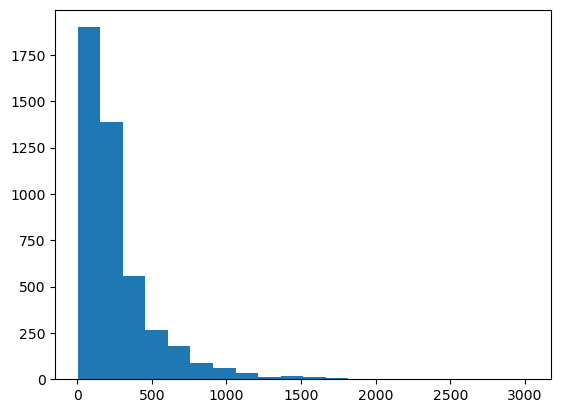

In [161]:
duration_data = bank_df['duration']
plt.hist(duration_data, bins = 20)
plt.show()

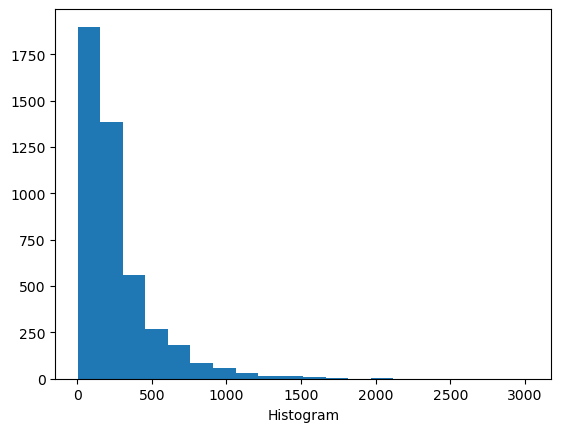

In [163]:
duration_data = bank_df['duration']
plt.hist(duration_data, bins = 20)
plt.xlabel("Histogram")
plt.show()

20
21
<BarContainer object of 20 artists>


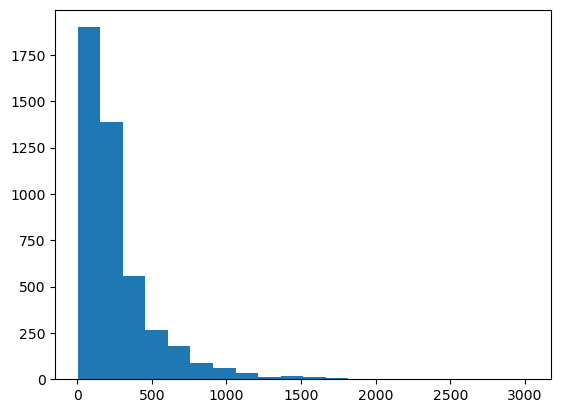

In [165]:
duration_data = bank_df['duration']
count,bins,x = plt.hist(duration_data, bins = 20)
print(len(count))
print(len(bins))
print(x)

In [167]:
Ub = 155.05
Lb = 4
con1 = duration_data < Ub
con2 = duration_data > Lb
con3 = con1 & con2
bank_df[con3]
len(bank_df[con3])

1898

In [169]:
Ub = 306.1
Lb = 155.05
con1 = duration_data < Ub
con2 = duration_data > Lb
con3 = con1 & con2
bank_df[con3]
len(bank_df[con3])

1386

In [171]:
Ub = 457.15
Lb = 306.1
con1 = duration_data < Ub
con2 = duration_data > Lb
con3 = con1 & con2
bank_df[con3]
len(bank_df[con3])

557

In [173]:
bins

array([   4.  ,  155.05,  306.1 ,  457.15,  608.2 ,  759.25,  910.3 ,
       1061.35, 1212.4 , 1363.45, 1514.5 , 1665.55, 1816.6 , 1967.65,
       2118.7 , 2269.75, 2420.8 , 2571.85, 2722.9 , 2873.95, 3025.  ])

In [175]:
interval = []
count_list = []
for i in range(20):
    intervals = f"{bins[i]} - {bins[i+1]}"
    # intervals1 = str(intervals)
    interval.append(intervals)
    count_list.append(count[i])

#print(count_list)
df2 = pd.DataFrame(zip(interval,count_list),
                      columns = ['Intervals','Count'])
df2

,Intervals,Count
0,4.0 - 155.05,1899.0
1,155.05 - 306.1,1386.0
2,306.1 - 457.15000000000003,557.0
3,457.15000000000003 - 608.2,268.0
4,608.2 - 759.25,181.0
5,759.25 - 910.3000000000001,86.0
6,910.3000000000001 - 1061.3500000000001,59.0
7,1061.3500000000001 - 1212.4,32.0
8,1212.4 - 1363.45,13.0
9,1363.45 - 1514.5,16.0


**Box Plot**

- Box plot is used to identify the outlier

- Outlier is an observation having huge positive value or huge negative value

- Q1 = 25p, Q2 = 50p, Q3 = 75p

- IQR = Inter Quartile Range = Q3 -Q1

- Q3 + 1.5*IQR and Q1 - 1.5*IQR

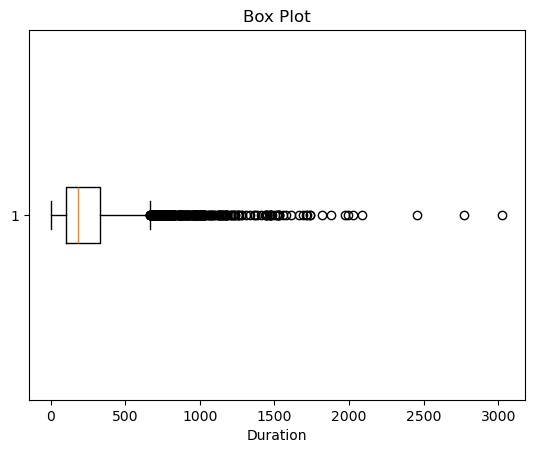

In [178]:
duration_data = bank_df['duration']
plt.boxplot(duration_data,vert=False)
plt.title("Box Plot")
plt.xlabel("Duration")
plt.show()

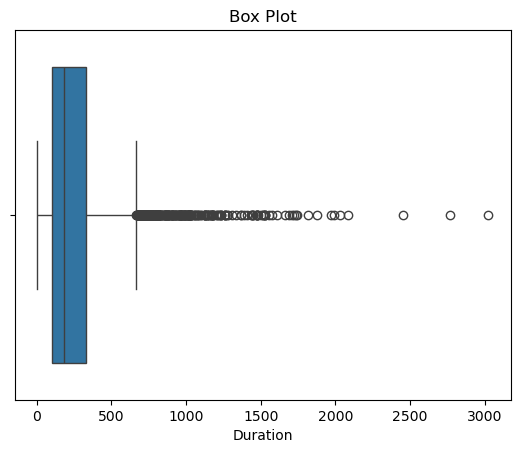

In [180]:
# By using seaborn

sns.boxplot(duration_data,orient = 'h')
plt.title("Box Plot")
plt.xlabel("Duration")
plt.show()

**Plot the distribution(histogram) plot and box plot**

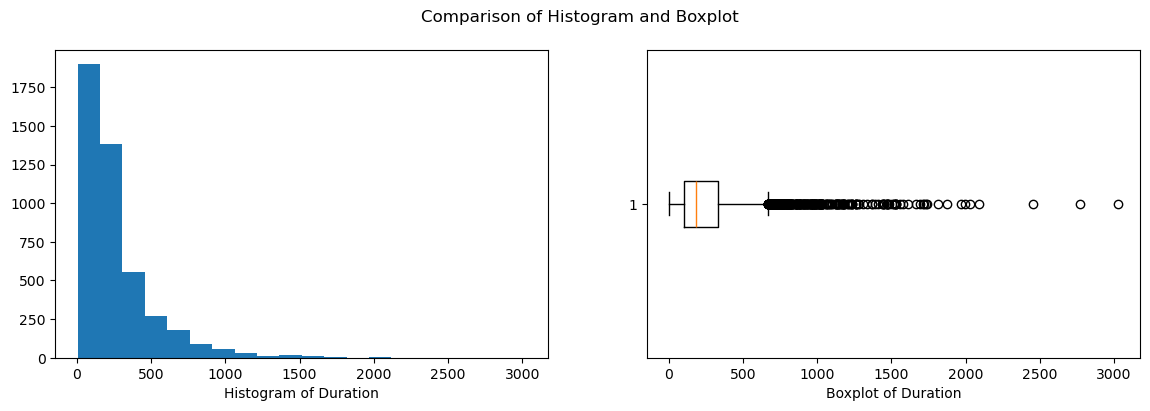

In [183]:
plt.figure(figsize=(14,4))

plt.suptitle("Comparison of Histogram and Boxplot")

plt.subplot(1,2,1)
plt.hist(duration_data, bins =20)
plt.xlabel("Histogram of Duration")

plt.subplot(1,2,2)
plt.boxplot(duration_data, vert= False)
plt.xlabel("Boxplot of Duration")
plt.show()

**Finding the Outliers**

- We already know that outliers available less than **Q1-1.5*IQR and Q3 + 1.5*IQR**

In [186]:
duration_data = bank_df['duration']

Q1 = round(np.percentile(bank_df['duration'],25),2)
Q2 = round(np.percentile(bank_df['duration'],50),2)
Q3 = round(np.percentile(bank_df['duration'],75),2)

IQR = Q3 -Q1

LB = Q1 - 1.5*IQR
UB = Q3 + 1.5*IQR

Con1 = duration_data>UB
Con2 = duration_data<LB
con3 = Con1 | Con2
outliers_data = duration_data[con3]
outliers_data

30       897
33       958
38       765
50      1018
51      1740
        ... 
4498     676
4503     816
4504     951
4505    1234
4511    1263
Name: duration, Length: 330, dtype: int64

**Finding Non-Outliers Data**

In [189]:
duration_data = bank_df['duration']

Q1 = round(np.percentile(bank_df['duration'],25),2)
Q2 = round(np.percentile(bank_df['duration'],50),2)
Q3 = round(np.percentile(bank_df['duration'],75),2)

IQR = Q3 -Q1

LB = Q1 - 1.5*IQR
UB = Q3 + 1.5*IQR

Con1 = duration_data<UB
Con2 = duration_data>LB
con3 = Con1 & Con2
non_outliers_data = duration_data[con3]
non_outliers_data

0        79
1       220
2       185
3       199
4       226
       ... 
4516    329
4517    153
4518    151
4519    129
4520    345
Name: duration, Length: 4191, dtype: int64

In [191]:
non_outliers_df=bank_df[con3]
non_outliers_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


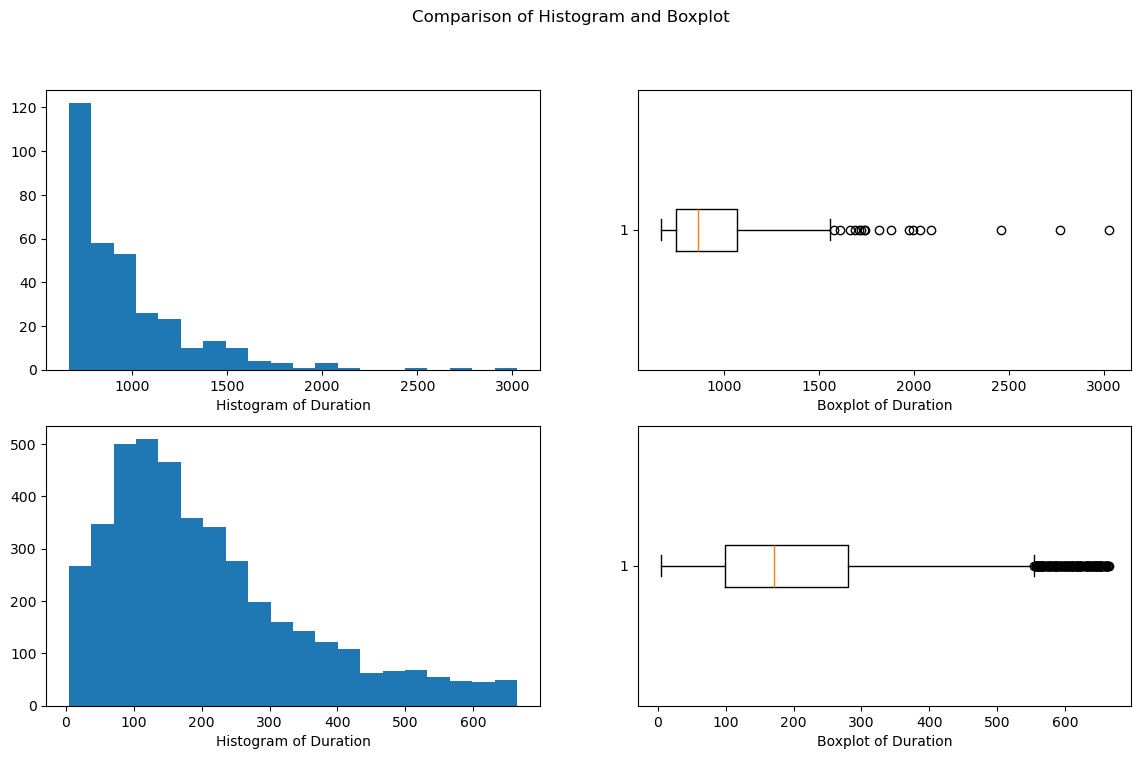

In [193]:
plt.figure(figsize=(14,8))

plt.suptitle("Comparison of Histogram and Boxplot")

plt.subplot(2,2,1)
plt.hist(outliers_data, bins =20)
plt.xlabel("Histogram of Duration")

plt.subplot(2,2,2)
plt.boxplot(outliers_data, vert= False)
plt.xlabel("Boxplot of Duration")


plt.subplot(2,2,3)
plt.hist(non_outliers_data, bins =20)
plt.xlabel("Histogram of Duration")

plt.subplot(2,2,4)
plt.boxplot(non_outliers_data, vert= False)
plt.xlabel("Boxplot of Duration")
plt.show()

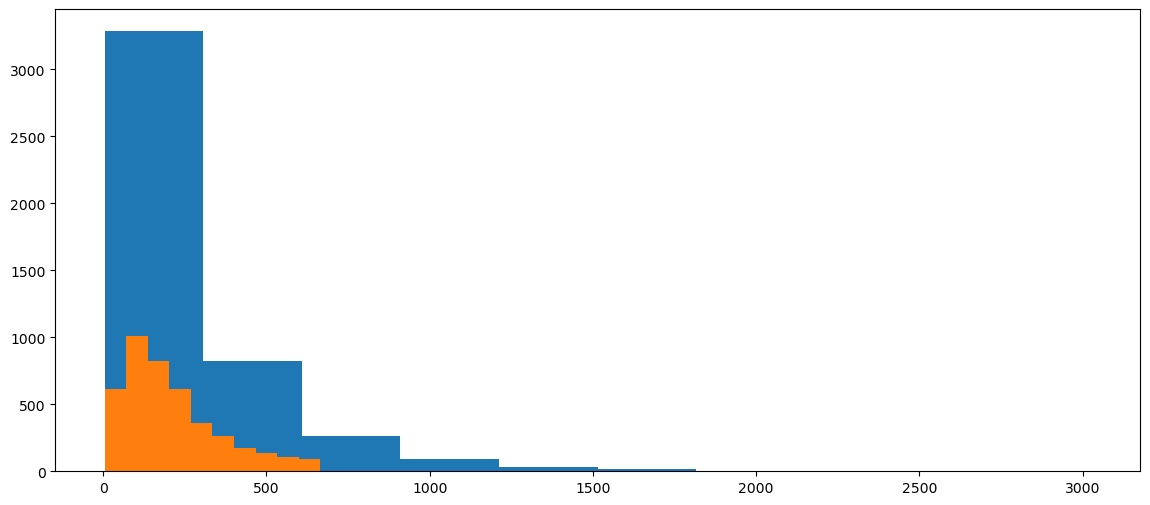

In [195]:
duration_data_non_outliers=non_outliers_df['duration']
duration_data=bank_df['duration']
plt.figure(figsize=(14,6))
plt.hist(duration_data)
plt.hist(duration_data_non_outliers)
plt.show()

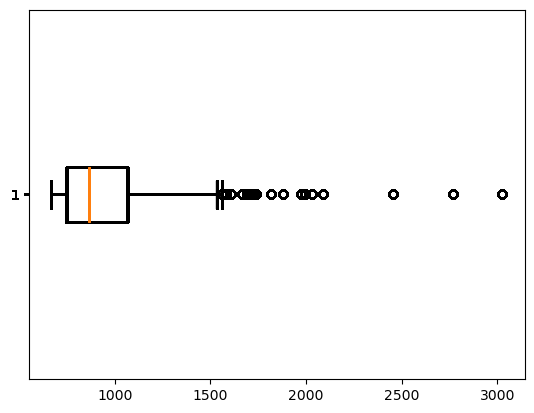

In [197]:
duration_data=bank_df['duration']
q1=round(np.percentile(bank_df['duration'],25),2)
q2=round(np.percentile(bank_df['duration'],50),2)
q3=round(np.percentile(bank_df['duration'],75),2)
IQR=q3-q1
lb=q1-1.5*IQR
ub=q3+1.5*IQR
con1=duration_data<lb
con2=duration_data>ub
con3=con1|con2
con3
# Bitwise operators used to compare 
# Bits data ==== 0 and 1 == True False
outliers_data=duration_data[con3]
outliers_data
median=outliers_data.median()
for i in outliers_data:
    a=outliers_data.replace(i,median)
    plt.boxplot(a,vert=False)

**np.where**

- In numpy we have a method called where

- It takes three arguments

  - 1. Condition
   
  - 2. value if condition is True
   
  - 3. value if condition is False
   
- It is applicable for only binary means if and else

In [204]:
list1=[]
for value in duration_data:
    if value<lb or value>ub:
        median=duration_data.median()
        list1.append(median)
    else:
        list1.append(value)


In [206]:
dict1={'Sub':['DS','DE','CS'],'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,Sub,marks
0,DS,100
1,DE,200
2,CS,300


In [208]:
# Q: I want to replace marks with 1, which are greater than 100
l=[]
for i in df.marks:
    if i > 100:
        l.append(1)
    else:
        l.append(i)
df['marks']=l
df

,Sub,marks
0,DS,100
1,DE,1
2,CS,1


In [210]:
dict1={'Sub':['DS','DE','CS'],'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,Sub,marks
0,DS,100
1,DE,200
2,CS,300


In [212]:
# Implement for the outliers
duration_data=bank_df['duration']
con1=duration_data<lb
con2=duration_data>ub
con=con1|con2
duration_median=duration_data.median()
l=np.where(con,duration_median,duration_data)
l

array([ 79., 220., 185., ..., 151., 129., 345.])

(array([ 614., 1009., 1153.,  618.,  357.,  265.,  171.,  136.,  103.,
          95.]),
 array([  4. ,  70.1, 136.2, 202.3, 268.4, 334.5, 400.6, 466.7, 532.8,
        598.9, 665. ]),
 <BarContainer object of 10 artists>)

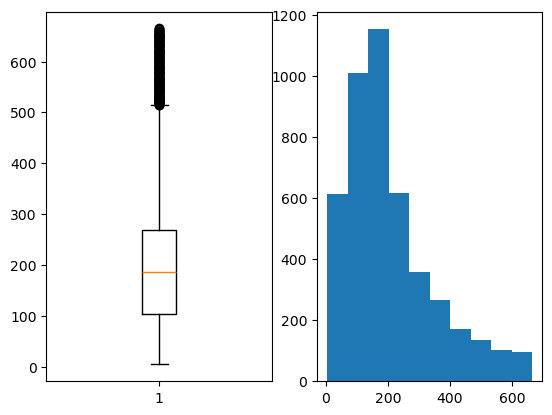

In [216]:
plt.subplot(1,2,1).boxplot(bank_df['duration_update'])
plt.subplot(1,2,2).hist(bank_df['duration_update'])

**Bi variate analysis**

- We already seen Uni variate analysis

- We performed the categorical column analysis

  - Frequency table(value counts)
 
  - Bar chart
 
  - Relative frequency table(value counts normalized force)
 
  - pie chart
 
- We performed the numerical column analysis

  - Histogram
 
  - Distribution plots
 
  - Box plot
 
  - Outlier analysis
 
  - Filling the outliers
 
- Now we will do categorical - categorical analysis

- Numerical - Numerical analysis

- Categorical - Numerical analysis

**Categorical - Categorical**

- Lets consider two columns

  - job

  - marital

In [219]:
cat_columns=bank_df.select_dtypes(include='object').columns
num_columns=bank_df.select_dtypes(exclude='object').columns
bank_df['job'].value_counts()

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

In [221]:
bank_df['marital'].value_counts()

marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64

- step-1: Make the first condition job == 'management'
- step-2: Make the second condition marital == 'married'
- step-3: Make the third condition: con1&con2
- step-4: Then retrieve the dataframe and take the count

In [224]:
jobs=bank_df['job'].unique()
married_list=[]
for i in jobs:
    con1=bank_df['job']==i
    con2=bank_df['marital']=='married'
    con3=con1&con2
    count=len(bank_df[con3])
    print(f"the number of married bank from {i} is: {count}")
    married_list.append(count)

the number of married bank from unemployed is: 75
the number of married bank from services is: 236
the number of married bank from management is: 557
the number of married bank from blue-collar is: 693
the number of married bank from self-employed is: 127
the number of married bank from technician is: 411
the number of married bank from entrepreneur is: 132
the number of married bank from admin. is: 266
the number of married bank from student is: 10
the number of married bank from housemaid is: 84
the number of married bank from retired is: 176
the number of married bank from unknown is: 30


In [226]:
jobs=bank_df['job'].unique()
married_list,single_list,divorced_list=[],[],[]
for i in jobs:
    con1=bank_df['job']==i
    con2=bank_df['marital']=='married'
    con3=bank_df['marital']=='single'
    con4=bank_df['marital']=='divorced'
    mar_con=con1&con2
    single_con=con1&con3
    div_con=con1&con4
    mar_count=len(bank_df[mar_con])
    single_count=len(bank_df[single_con])
    div_count=len(bank_df[div_con])
    print(f"the number of married bank from {i} is: {mar_count}")
    print(f"the number of single bank from {i} is: {single_count}")
    print(f"the number of divorced bank from {i} is: {div_count}")
    married_list.append(mar_count)
    single_list.append(single_count)
    divorced_list.append(div_count)

the number of married bank from unemployed is: 75
the number of single bank from unemployed is: 31
the number of divorced bank from unemployed is: 22
the number of married bank from services is: 236
the number of single bank from services is: 119
the number of divorced bank from services is: 62
the number of married bank from management is: 557
the number of single bank from management is: 293
the number of divorced bank from management is: 119
the number of married bank from blue-collar is: 693
the number of single bank from blue-collar is: 174
the number of divorced bank from blue-collar is: 79
the number of married bank from self-employed is: 127
the number of single bank from self-employed is: 41
the number of divorced bank from self-employed is: 15
the number of married bank from technician is: 411
the number of single bank from technician is: 268
the number of divorced bank from technician is: 89
the number of married bank from entrepreneur is: 132
the number of single bank from 

In [228]:
jobs
married_list
cols=['jobs','married']
df1=pd.DataFrame(zip(jobs,married_list),columns=cols)
df1

,jobs,married
0,unemployed,75
1,services,236
2,management,557
3,blue-collar,693
4,self-employed,127
5,technician,411
6,entrepreneur,132
7,admin.,266
8,student,10
9,housemaid,84


In [230]:
jobs
single_list
cols=['jobs','single']
df2=pd.DataFrame(zip(jobs,single_list),columns=cols)
df2

,jobs,single
0,unemployed,31
1,services,119
2,management,293
3,blue-collar,174
4,self-employed,41
5,technician,268
6,entrepreneur,20
7,admin.,143
8,student,74
9,housemaid,15


In [232]:
jobs
divorced_list
cols=['jobs','divorced']
df3=pd.DataFrame(zip(jobs,divorced_list),columns=cols)
df3

,jobs,divorced
0,unemployed,22
1,services,62
2,management,119
3,blue-collar,79
4,self-employed,15
5,technician,89
6,entrepreneur,16
7,admin.,69
8,student,0
9,housemaid,13


In [234]:
cols=['married','single','divorced']
df4=pd.DataFrame(zip(married_list,single_list,divorced_list),index=jobs,columns=cols)
df4

,married,single,divorced
unemployed,75,31,22
services,236,119,62
management,557,293,119
blue-collar,693,174,79
self-employed,127,41,15
technician,411,268,89
entrepreneur,132,20,16
admin.,266,143,69
student,10,74,0
housemaid,84,15,13


**Cross tab**

- The above dataframe we can make by using a method: **cross tab**

- It is available in pandas

- It takes two arguments

  - index
 
  - column
 
- In above dataframe index column is: **job**

- In above dataframe data column is: **marital**

In [237]:
idx_column=bank_df['job']
data_column=bank_df['marital']
df5=pd.crosstab(idx_column,data_column)
df5

marital,divorced,married,single
job,,,
admin.,69,266,143
blue-collar,79,693,174
entrepreneur,16,132,20
housemaid,13,84,15
management,119,557,293
retired,43,176,11
self-employed,15,127,41
services,62,236,119
student,0,10,74


<Axes: xlabel='job'>

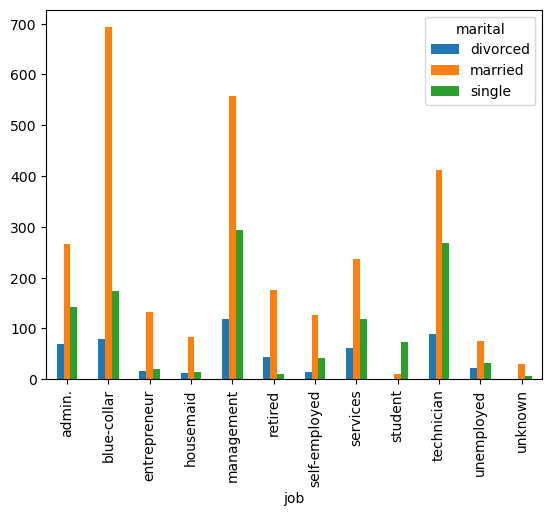

In [239]:
df5.plot(kind='bar')

<Axes: >

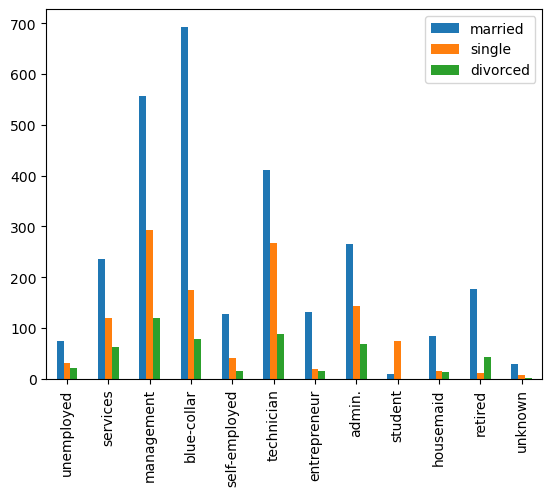

In [241]:
df4.plot(kind='bar')

In [243]:
idx_column=bank_df['job']
data_column=[bank_df['education'],bank_df['marital']]
df6=pd.crosstab(idx_column,data_column)
df6

education      primary                secondary                tertiary  \
marital       divorced married single  divorced married single divorced   
job                                                                       
admin.               3      12      2        58     218    117        3   
blue-collar         37     284     48        37     377    110        0   
entrepreneur         2      22      2         5      45      8        8   
housemaid            6      48      3         5      20      3        2   
management           2      33      4        11      73     32      103   
retired             13      64      3        17      83      5        9   
self-employed        2      12      1         4      59     13        9   
services             5      15      5        53     204    106        1   
student              0       0      2         0       4     43        0   
technician           2      12      1        67     299    154       17   
unemployed           7      17      2        13      38     17        2   
unknown              0       7      0         0       7      1        1   

education                     unknown                 
marital       married single divorced married single  
job                                                   
admin.             27     21        5       9      3  
blue-collar         3      9        5      29      7  
entrepreneur       55     10        1      10      0  
housemaid          12      8        0       4      1  
management        434    250        3      17      7  
retired            20      2        4       9      1  
self-employed      53     26        0       3      1  
services           11      4        3       6      4  
student             3     16        0       3     13  
technician         88    106        3      12      7  
unemployed         19     11        0       1      1  
unknown             2      5        0      14      1

<Axes: xlabel='job'>

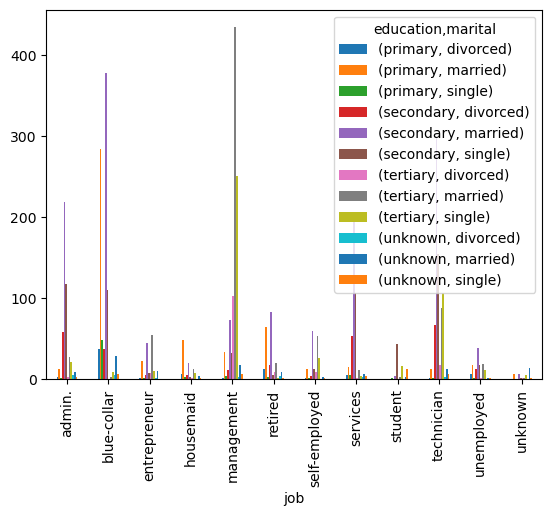

In [245]:
df6.plot(kind='bar')

In [249]:
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,duration_update
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,79.0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,220.0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,185.0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,199.0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,329.0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,153.0
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,151.0
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,129.0


In [251]:
cat_column

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [259]:
bank_defult_uni=bank_df['default'].unique()
bank_defult_uni

array(['no', 'yes'], dtype=object)

**Encoding**
- Encoding means converting categorical data to numerical data because ML modes expect the data should be in Numerical format
- ML models are developed by Math Algorithms
- It is very very important to apply encoding
- the following methods are
    - map
    - np.where
    - one hot encoding
    - label encoder

***Map Method***
- Mapping is one method to categorical values to numerical values
- Take one categorical column
- get unique label first
- make a dictionary with assign a number to each label
- for eg:
    - case_states has 2 labels:
        - Certified
        - Denied
        - Assign 0 to Certified, 1 to Denied
        - Create a dictionary labelled as keys, numbers as values only
        - {'Certified':0,'Denied':1}
**Steps to follow in Map**
1. Read the column
2. get the unique labels
3. make a dictionary
4. apply the map

In [261]:
d={'no':0,'yes':1}
bank_df['default_new'] = bank_df['default'].map(d)

In [263]:
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,duration_update,default_new
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,79.0,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,220.0,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,185.0,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,199.0,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,226.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,329.0,0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,153.0,1
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,151.0,0
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,129.0,0


In [265]:
for i in cat_column:
    unique_labels =sorted(bank_df[i].unique())
    list1 = [i for i in range (len(unique_labels))]
    dict1 = dict(zip(unique_labels,list1))
    bank_df[i] = bank_df[i].map(dict1)

In [267]:
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,duration_update,default_new
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0,79.0,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0,220.0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0,185.0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0,199.0,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0,226.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0,329.0,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0,153.0,1
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0,151.0,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0,129.0,0


- Now the **Categorical columns** have now become **Numerical columns** which will help as the data is completely numerical data

***Label Encoder***
- Label Encoder is a method to convert cat data to numerical data
- Label Encoderis the same way, how we did it above
- the for loop map we explored
- but the Label Encoder also do the same
- the is under **sickit-learn** we call it **sklearn**
- under sklearn, we have a class called as preprocessing
- because currently, we are doing data preprocessing only
- under a preprocessing class we have a method called as **Label Encoder**
- sklearn
    - preprocessing
    - Label Encoder
- any sklearn packages has 3 steps
    1. Read the package
    2. save the package
    3. apply the fit transform to data 

In [275]:
# step1: Read the package/load method
from sklearn.preprocessing import LabelEncoder
#step2: Save the package/ call the method
le = LabelEncoder()
bank_df['contact'] = le.fit_transform(bank_df['contact'])
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,duration_update,default_new
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0,79.0,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0,220.0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0,185.0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0,199.0,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0,226.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0,329.0,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0,153.0,1
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0,151.0,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0,129.0,0


In [277]:
bank_df = pd.read_csv('Bank_data_sep.csv')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_column:
    bank_df[i] = le.fit_transform(bank_df[i])

bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0


***Fit and Transform***
- fit means developing the logic
- transform means to process the logic
- if we observe in the map method first we developed dictionary logic
- then we apply that dictionary to the column
- Developing the dictionary is fit
- apply the dictionary to columns means we are transforming the data to numerical data
- whenever we are transforming to change the data then use **Fit transforming**
- if we are not changing the data then only **Fit**

***np.where***
- using np.where also we can change the categorical data to numerical
- but np.where is only for binary condition
- np.where is same as if-else
- if condition is True: we will apply True value
- if condition is False: we will apply False value
- so np.where use for only binary labels
- a column should only have 2 unique values

In [281]:
bank_df = pd.read_csv('Bank_data_sep.csv')
con = bank_df ['default'] =='no'
bank_df['default'] = np.where(con,0,1)
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,0,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,0,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,0,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,0,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,1,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,0,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,0,1137,no,no,cellular,6,feb,129,4,211,3,other,no
